# <center>Smart lamps for Singapore<center>
### <center>Reducing energy waste through distributed artificial intelligence<center>

## 1. The problem and the solution
Outside litghining is on throughout the night, even though the illuminated areas are sparingly used. 
This results in energy waste, how can we solve that? 
We need to keep in mind that the solution should be cheap (at least in the long run), easy to maintain, scalable, and ensure high quality fo service to users. 

**A basic solution** would be to equip each lamp with a proximity sensor, and turn the light on only when a user is nearby. 
However, this won't work if the user has a high speed (e.g. bike, or car). 
This basic approach provides very low quality of service to high-speed users, and can even result in uneccessary risk (car accidents etc).

**We propose a more intelligent solution:** making the lighting system capable of predicting the trajectory of users, and illuminating the path that user will follow beforehad. 
Doing so will allow us to keep the lights mostly off, while ensuring high quality of service for all users, regardless of speed. 

Each lamp will be endowed with rudimentary computing and telecom hardware.
This will form an distributed, intelligent network - which will be able to learn the behaviour of users and adapt the activity of the lighting system. 
As a result we will have drastic reducing in energy usage, without loss in QoS, and without any technical hurdles.

![title](images/overview.png)


## 2. What is the estimated impact?
The impact of the solution can be understood in terms of quality of service (QoS), energy savings, financial impact, and operational complexity.

#### 2.1 Financial impact
An initial investment in hardware and installation will be required, but the energy savings should eventually compensate for this initial cost.

Each lamp should be equiped with:
- A proximity sensor (one for each lamp).
- A computing device (one device may be used for multiple lamps).
- Telecom unit (enabling the communication between computing devices on a local scale). 

In order to reduce costs, one computing device and telecom unit can be linked to multiple lamps.
A fraction of the computing units should also have internet connectivity, to contact the lighting system operator in case of malfunctions - or to provide perfomance related data (usage statistics, user complaints, etc). 

#### 2.2 Energy savings: 
- Most outside areas are only populated for a small fraction of the nighttime. For example, the outside ares of the NTU campus is populated during 20:00 to 23:00. After that (23:00 to 06:00) people pass sparsely.
- This will allow us to turn off the lights (or at least activate them sparsly) for about 7 hours per night.
- We therefore may expect a reduction of energy consumption by about 7hours/10hours = 70%

#### 2.3 QoS
By predicting the paths that users will follow we expect to have negligible impat on QoS.
The path that users will follow will be illuminated beforehand, regardless of the user's speed (walker, bike or car).

####  2.4 Operational complexity
The distributed nature of the proposed solution results in near zero operational complexity:
- Place a new lamp? It will integrate seemlessly in with its neighbours.
- Scalability: an artitraty number of smart lamps can be placed, since processing is decentralised.
- The lighting system will be able to adapt to changes in user behaviour (e.g. change in user trajectory due to a new road) without any action. 
- Reliability: no single point of failure. Lamps can fail individually - without damaging the entire system. 



## 3. Lamp intelligence
Let us refer to each *(lamp + proximity sensor + computing unit + telecom unit)* as a smartlamp.

We want the smartlamps to turn on $T$ seconds *before* a user goes near them. 
Doing so requires that smartlamp will be capable of predicting the trajectory that a user will follow.
How can we do that? 
We are proposing continuous learning approach, that relies on the communication capabilities of the smartlamp:
1. Each time a smartlamp's sensor is activated, the smartlamp will 
    1. store this information, and 
    2. inform neighbouring smartlamps.
2. Each smartlamp will store the all signals of sensors activation, forming a local DB of activity.
3. Periodically, each lamp will use the last $M$ entries of its local DB to train a predictive algorithm.
4. Then, the smartlamp will be off (or dimmed) until:
    1. its own proximity sensor is activated
    2. or until the smarlamp's predictive model predicts that a user will approach soon (within the next $T$ seconds).

#### 3.1 ML/predictive algorithm
Let us assume the role of a smartlamp. 
The general problem here is one where we use spatiotemporal data (the signals of my neighbours) to predict temporal data (my future state). 
There are at least two pontetial solutions to this problem:
1. First, we may use RNNs. However if we do so we will have to define a maximum look-back period. By defining a maximum look back period we will be limitting the predictive capacity of the system. For example, if we define a maximum lookback of 1 minute, we will not be able to detect patterns that span over one minute.
2. We may use reservoir computing methods, which do not require us to define a maximum lookback. I specifically reccomend the usage of liquid state machines (LSM):
    - Trainging an LSM is a convex problem, which can be easily solved with a local search. This means that training the LSM is both lightweight and robust, and allows for cheap computing units.
    - A single LSM can be used to predict multiple outputs at no additional cost. This means that each computing node can be used to control multiple lamps, at no additional costs.
    - LSMs rely on spikign neural networks, which are highly energy efficient.  
    - LSMs can have arbitrary lookback periods, allowing the smartlamps to have long memory if needed. 
    
#### 3.2 Feature engineering
The liquid state machine does not require high-quality features to achieve high performance. 
The features used as inputs in the LSM can be directly the sensor outpus. 
Specifically, each LSM will have an input neuron for each proximity sensor it has access to. 

#### 3.3 Evaluation & deployment
The first step to implementing an actual smart lamp would be to ensure the proper function of a small mesh (10 to 20 units) in a demo application. 
This application could be a lab, an office space, or a university campus. 

At first, the system is operate in an 'always on' mode, while accumulating data on user behaviour. 
Once enough data has been accumulated to allow for training the smartlamp's AI, we may manually activate the 'smart' functionality.

We should expect a small number of complaints during this testing phase, along with a considerable reduction in energy usage. 
During evaluation, feedback on the operation of the lamps could be obtained manually - by contacting users directly. 
Upon deployment, the feedback system should become automated. 
One possible way for this would be a 'rate this lamp' feature, where users may flag a lamp as dysfunctional/suboptimal through a mobile phone app. 

If the user feedback is negative we can diagnose the source of the problem and adjust the system accordingly: increase the time interval $T$ (to make lamps light up earlier) or increase the quality of features (by using telecom units or sensors with longer radii).

    
#### 3.4 Expandability
An additional advantage of the proposed infrastructure is its technical flexibility. 
Equiping lamps with general purpose processing units and communication capabilities allows for the deployment of additional or alternative applications down the line. 
The 'rate this lamp' feature is an example, but additionall functionallities can be deployed - such as:
- meshed message passing to enable emergency communications in the a disaster scenario
- allowing the system operator to turn all the lights on (for easthetic reasons, or for emergency scenarios)


# 5. Conclusion
In short, we propose to install numerous lightweight, inexpensive units - each controlling one or more lamps. 
These units will form an intelligent meshed network, capable of learning (and dynamically adapting) the everchanging user behaviour. 
By predicting the needs of users (using a continuously learning liquid state machine), these units will be able to minimizing energy waste by turning off needless lights - all while ensuring high quality of service, easy maintenance, and high reliability. 


# Clarification: Features
Here I visually explain what constitutes a sample in the proposed application.
We want to use the recent data of our the sensors avaible to the lamp to predict whether a user will be appraoching the lamp in the next $T$ seconds. For this small example, we will assume $T=1$. We will also assume that we only have access to single neighbour, who has a single sensor.

**Refferencing the figure below:**
We have access to single neighbour, and the state of his sensor is shown in blue. 
Our sensor's state is shonw is red. Note that our sensor activates at t=1.
We want to predict this event, using the recent data from the neighbourign sensor.
The ideal behaviour woudl result in the red dashed line: we will have activated our lamp in advance.

To that end, we will be using all information in the blue line. 
For example, if we were at t=0, we would be using the blue line up until t=0.

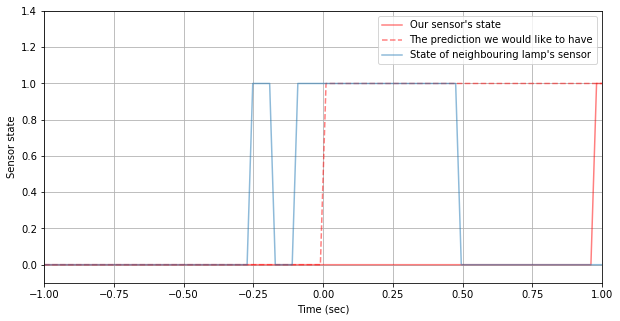

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-1,1,100)

plt.figure(figsize=(10,5))
plt.plot(t, np.linspace(0,1.02,100)>1, 'r', label="Our sensor's state", alpha=.5)
plt.plot(t, np.linspace(0,2,100)>1, '--r', label="The prediction we would like to have", alpha=.5)
plt.plot(t, np.random.uniform(-0.5, .5, 100).cumsum()>0.9, label="State of neighbouring lamp's sensor", alpha=.5)

plt.ylim([-0.1, 1.4])
plt.xlim([-1,1])

plt.legend()
plt.grid()

plt.ylabel('Sensor state')
plt.xlabel('Time (sec)')

plt.show()